In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.mnist.load_data()

# 데이터 전처리
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

# 검증세트로 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [139]:
len(test_target)

10000

In [2]:
# 모델 생성
model = keras.Sequential()

# 은닉층
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
# 출력층
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [3]:
# 모델 설정
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
model.fit(train_scaled, train_target, epochs=5)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 63us/sample - loss: 0.4292 - accuracy: 0.8875
Epoch 2/5
48000/48000 [==============================] - 2s 51us/sample - loss: 0.2206 - accuracy: 0.9354
Epoch 3/5
48000/48000 [==============================] - 2s 51us/sample - loss: 0.1736 - accuracy: 0.9500
Epoch 4/5
48000/48000 [==============================] - 2s 51us/sample - loss: 0.1436 - accuracy: 0.9574
Epoch 5/5
48000/48000 [==============================] - 3s 55us/sample - loss: 0.1232 - accuracy: 0.9642


In [5]:
# 데이터 전처리
train_scaled = train_input / 255.0

# 검증세트로 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)


# 모델 생성
model = keras.Sequential()

# 유틸
model.add(keras.layers.Flatten(input_shape=(28, 28)))
# 은닉층
model.add(keras.layers.Dense(100, activation='relu', name='relu'))
# 출력층
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
relu (Dense)                 (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 56us/sample - loss: 0.2889 - accuracy: 0.9182
Epoch 2/5
48000/48000 [==============================] - 2s 49us/sample - loss: 0.1460 - accuracy: 0.9580
Epoch 3/5
48000/48000 [==============================] - 2s 52us/sample - loss: 0.1073 - accuracy: 0.9694
Epoch 4/5
48000/48000 [==============================] - 2s 51us/sample - loss: 0.0866 - accuracy: 0.9757
Epoch 5/5
48000/48000 [==============================] - 2s 51us/sample - loss: 0.0740 - accuracy: 0.9794


In [10]:
# 모델 생성
model = keras.Sequential()

# 유틸
model.add(keras.layers.Flatten(input_shape=(28, 28)))
# 은닉층
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
# 출력층
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_scaled, train_target, batch_size=100, epochs=10)

Train on 48000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 47us/sample - loss: 0.3324 - accuracy: 0.9012
Epoch 2/10
48000/48000 [==============================] - 2s 33us/sample - loss: 0.1221 - accuracy: 0.9632
Epoch 3/10
48000/48000 [==============================] - 2s 34us/sample - loss: 0.0817 - accuracy: 0.9746
Epoch 4/10
48000/48000 [==============================] - 2s 34us/sample - loss: 0.0611 - accuracy: 0.9816
Epoch 5/10
48000/48000 [==============================] - 2s 33us/sample - loss: 0.0460 - accuracy: 0.9854
Epoch 6/10
48000/48000 [==============================] - 2s 34us/sample - loss: 0.0378 - accuracy: 0.9881
Epoch 7/10
48000/48000 [==============================] - 2s 34us/sample - loss: 0.0305 - accuracy: 0.9906
Epoch 8/10
48000/48000 [==============================] - 2s 33us/sample - loss: 0.0245 - accuracy: 0.9925
Epoch 9/10
48000/48000 [==============================] - 2s 33us/sample - loss: 0.0208 - accuracy: 0.9932
Epoch 10/10
48

In [164]:
from PIL import Image

img = Image.open("../data/test.png")
img.size

(28, 28)

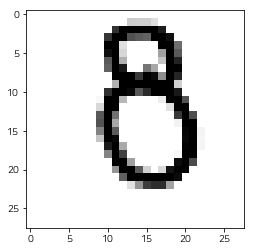

In [165]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img, cmap='gray_r')

In [166]:
import numpy as np
img = np.resize(img, (28, 28))
test_img = np.array(img) / 255.0
test_img = test_img.reshape(-1, 28, 28)
test_img.shape

(1, 28, 28)

In [167]:
preds = model.predict(test_img)
preds

array([[0.0000000e+00, 0.0000000e+00, 1.4340836e-32, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

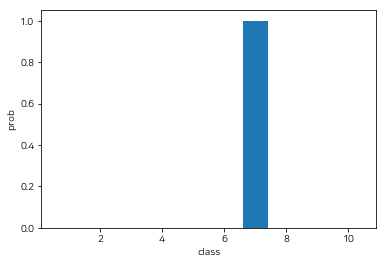

In [168]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

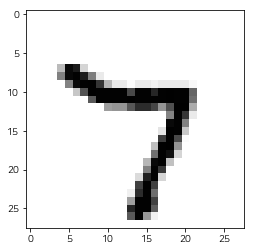

In [70]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')

In [141]:
pred = model.predict(val_scaled[0:1])
pred

array([[1.8453410e-21, 3.0899345e-17, 2.2087630e-19, 2.1026729e-16,
        8.2325079e-20, 1.3883307e-15, 5.8514444e-24, 1.0000000e+00,
        1.5157503e-19, 3.0555602e-14]], dtype=float32)

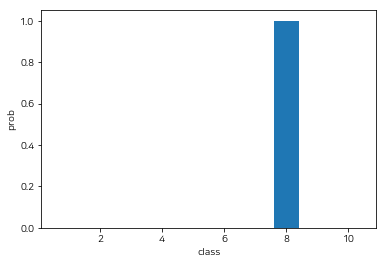

In [142]:
plt.bar(range(1, 11), pred[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [144]:
val_scaled[0:1].shape

(1, 28, 28)